# Institución Universitaria Pascual Bravo

Curso: Reconocimiento patrones

Docente: Juan Carlos Briñez de León


Problem:


MNIST classification.
https://www.kaggle.com/datasets/zalando-research/fashionmnist?select=fashion-mnist_test.csv

# **1. Problema visto desde las características geométricas.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#1. Importando dataset.
import cv2 # OpenCV para computer vision
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Para graficar

#Cargando datos MNIST dataset
dataset_tr = pd.read_csv(r'/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 8/fashion-mnist_train.csv')
dataset_tr = np.array(dataset_tr)
dataset_ts = pd.read_csv(r'/content/drive/MyDrive/Semestre 8/ReconocimientoDePatrones/Semana 8/fashion-mnist_test.csv')
dataset_ts = np.array(dataset_ts)

In [19]:
#2. Dividing dataset into input (X) and output (Y) variables
X_train = dataset_tr[:,1:785] #toma de la segunda col hasta la ultima
Y_train = dataset_tr[:,0] #Todas las filas de la col 0 que son las etiquetas
X_test = dataset_ts[:,1:785]
Y_test = dataset_ts[:,0]
print('La entrada de entrenamiento es de: ',X_train.shape,' y la salida es de: ',Y_train.shape )
print('La entrada de testing es de: ',X_test.shape)

La entrada de entrenamiento es de:  (60000, 784)  y la salida es de:  (60000,)
La entrada de testing es de:  (10000, 784)


La etiqueta de esta prenda es:  Vestido


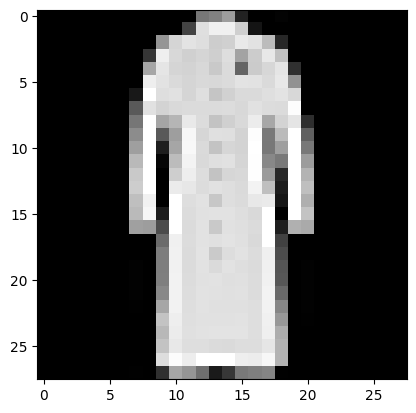


La etiqueta de esta prenda es:  3


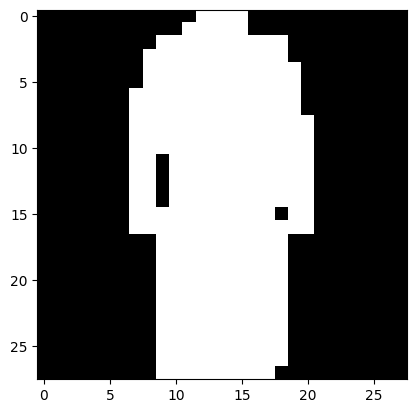

In [20]:
#3. Showing the dataset images and labels (Para entender el dataset)
Elementos = ['Camiseta', 'Sudadera', 'Saco_1', 'Vestido', 'Abrigo', 'Sandalia','Saco_2','Tenis','Bolso','Botas']

Index = 58793 #Fila

Imagen = X_train[Index,:]
Imagen = Imagen.reshape((28,28)) #Hay que redimensionarlo porque en el dataset se encuentra como un vector fila
Bandera, Imagen_bin = cv2.threshold(np.uint8(Imagen),20,255,cv2.THRESH_BINARY) #Binarizando la imagen

plt.imshow(Imagen.astype('uint8'),cmap='gray',vmin=0, vmax=255)
print('La etiqueta de esta prenda es: ',Elementos[Y_train[Index]])
plt.show()

print('')

plt.imshow(Imagen_bin.astype('uint8'),cmap='gray',vmin=0, vmax=255)
print('La etiqueta de esta prenda es: ',Y_train[Index])
plt.show()

In [27]:
#4. Procesando las imágenes y extrayendo características una por una.

MC_Xtrain = np.zeros((X_train.shape[0],8)) # Matriz de caracteristicas, El tamaño es el total de las imágenes x las Características a tener en cuenta

for i in range(X_train.shape[0]):
  Imagen = X_train[i,:]
  Imagen = Imagen.reshape((28,28)) # se forma otra vez la imagen
  Imagen = np.uint8(Imagen) # Se lleva a formato de imagen
  Bandera, Imagen_bin = cv2.threshold(Imagen,20,255,cv2.THRESH_BINARY) #Se binariza para tener el contorno


  #Extracción de características de la imagen
  contours, _ = cv2.findContours(Imagen_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) > 0:
    Region = max(contours, key=cv2.contourArea)

    # Alto y ancho
    P1,P2,Ancho,Alto = cv2.boundingRect(Region)

    # Calcular área
    area = cv2.contourArea(Region)/(28*28) # Un valor

    # Calcular perímetro
    perimetro = cv2.arcLength(Region, closed=True) # un valor

    # Calcular el centro de masa
    Momentos = cv2.moments(Region)
    center_x = int(Momentos['m10'] / Momentos['m00']) #Un valor
    center_y = int(Momentos['m01'] / Momentos['m00']) #Un valor

    # Calcular la circularidad
    circularity = (4 * np.pi * area) / (perimetro ** 2) #Un valor

    # Calcular la elipticidad
    # A veces genera erroes por eso el profe le pone un try except
    try:
      _, (major_axis, minor_axis), _ = cv2.fitEllipse(Region)
      ellipticity = major_axis / minor_axis # Un valor
    except:
      ellipticity = 0

    hu_moments = np.transpose(cv2.HuMoments(Momentos)) # Siete valores

    MC_Xtrain[i,0] = area
    MC_Xtrain[i,1] = perimetro
    MC_Xtrain[i,2] = center_x
    MC_Xtrain[i,3] = center_y
    MC_Xtrain[i,4] = circularity
    MC_Xtrain[i,5] = ellipticity
    #MC_Xtrain[i,6:13] = hu_moments
    MC_Xtrain[i,6] = Alto
    MC_Xtrain[i,7] = Ancho

In [28]:
#5. Normalizando las características para que las medidas queden entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MC_Xtrain = scaler.fit_transform(MC_Xtrain)

===================================================================

In [29]:
#6. Realizando el mismo ejercicio para los datos de testeo
MC_Xtest = np.zeros((X_test.shape[0],8)) # El tamaño es el total de las imágenes x las Características a tener en cuenta
for i in range(X_test.shape[0]):
  Imagen = X_test[i,:]
  Imagen = Imagen.reshape((28,28))
  Imagen = np.uint8(Imagen)
  Bandera, Imagen_bin = cv2.threshold(Imagen,20,255,cv2.THRESH_BINARY)


  #Extracción de características de la imagen
  contours, _ = cv2.findContours(Imagen_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) > 0:
    Region = max(contours, key=cv2.contourArea)

    # Alto y ancho
    P1,P2,Ancho,Alto = cv2.boundingRect(Region)


    # Calcular área
    area = cv2.contourArea(Region)/(28*28) # Un valor

    # Calcular perímetro
    perimetro = cv2.arcLength(Region, closed=True) # un valor

    # Calcular el centro de masa
    Momentos = cv2.moments(Region)
    center_x = int(Momentos['m10'] / Momentos['m00']) #Un valor
    center_y = int(Momentos['m01'] / Momentos['m00']) #Un valor

    # Calcular la circularidad
    circularity = (4 * np.pi * area) / (perimetro ** 2) #Un valor

    # Calcular la elipticidad
    try:
      _, (major_axis, minor_axis), _ = cv2.fitEllipse(Region)
      ellipticity = major_axis / minor_axis # Un valor
    except:
      ellipticity = 0

    hu_moments = np.transpose(cv2.HuMoments(Momentos)) # Siete valores

    MC_Xtest[i,0] = area
    MC_Xtest[i,1] = perimetro
    MC_Xtest[i,2] = center_x
    MC_Xtest[i,3] = center_y
    MC_Xtest[i,4] = circularity
    MC_Xtest[i,5] = ellipticity
    # MC_Xtest[i,6:13] = hu_moments
    MC_Xtest[i,6] = Alto
    MC_Xtest[i,7] = Ancho

In [30]:
#7. Normalizando datos
MC_Xtest = scaler.transform(MC_Xtest)

========================================================================

In [31]:
#8. Entrenando un clasificador para la toma de decisiones
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score

Modelo_KNN = KNeighborsClassifier(5)
Modelo_KNN.fit(MC_Xtrain, Y_train)

Y_pred =Modelo_KNN.predict (MC_Xtest)

print("Accuracy KNN",accuracy_score(Y_test, Y_pred))

Accuracy KNN 0.764


Mostrando métricas globales individuales: 
Accuracy KNN 0.764
Precision KNN 0.7621327437115959
Recall KNN 0.7639999999999999
F1_Score KNN 0.7605449802553023
 
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.68      0.78      0.72      1000
           1       0.95      0.94      0.95      1000
           2       0.62      0.70      0.66      1000
           3       0.77      0.84      0.80      1000
           4       0.58      0.58      0.58      1000
           5       0.84      0.82      0.83      1000
           6       0.56      0.39      0.46      1000
           7       0.80      0.81      0.81      1000
           8       0.93      0.86      0.89      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

 


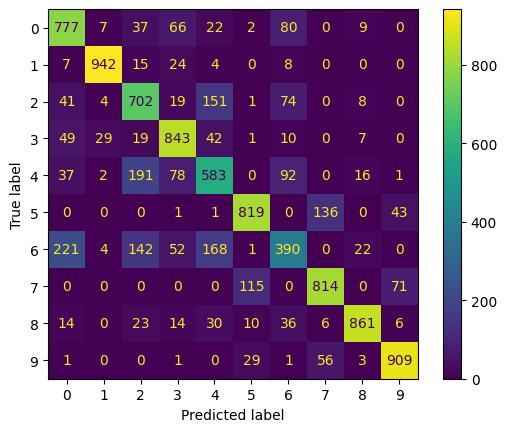

In [33]:
#9. Analizando desempeño con muchas métricas
from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred))
print("Precision KNN",PR(Y_test, Y_pred, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred, labels=Modelo_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels=Modelo_KNN.classes_)
disp.plot()

==========================================================================

In [34]:
#10. Revisando varios casos del test
Test = [150,700,1500,4000,5420,7100,8754,9500] #Son imàgenes
for i in (Test):
  Target_im = X_test[i,:].reshape((28,28))
  Target=np.zeros((1,15))
  Target[0,:] = MC_Xtest[i,:]
  Prediction = Modelo_KNN.predict (Target)
  print("La predicción de KNN es:",Elementos[Prediction[0]],', y debería ser: ',Elementos[Y_test[i]])
  plt.imshow(Target_im.astype('uint8'),cmap='gray',vmin=0, vmax=255)
  plt.show()
  print('')
  print('')

ValueError: could not broadcast input array from shape (8,) into shape (15,)

===========================Validando el ejercicio con otros autores======

[Clic aquí para ver sitio](https://katiecodes.io/006_imageClassificationWithFashionMNIST/006_imageClassificationWithFashionMNIST/)

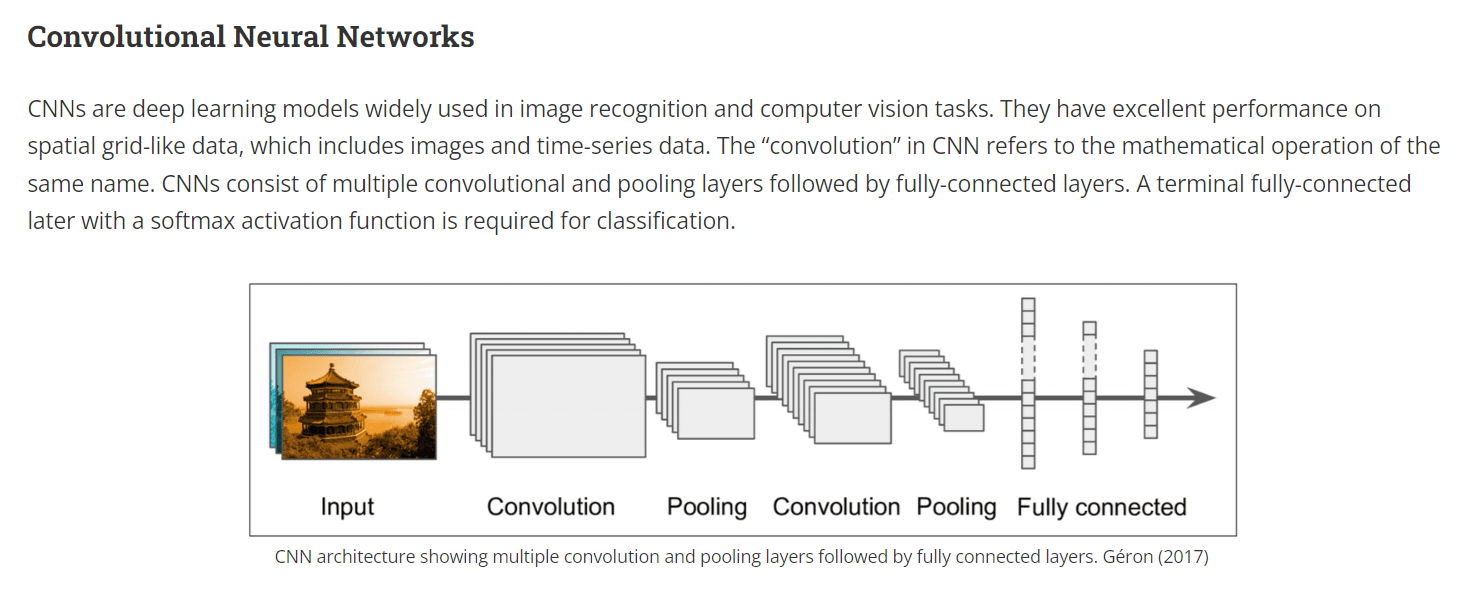

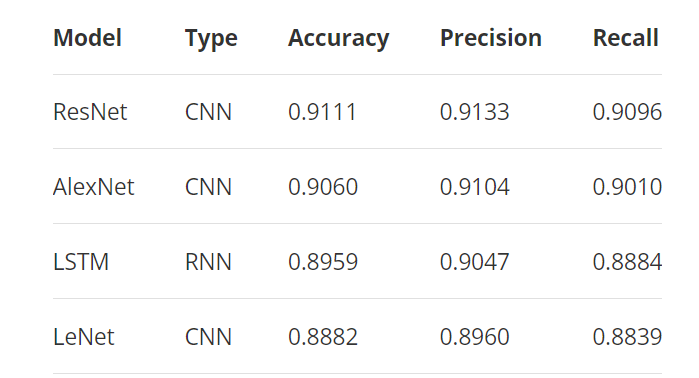

1. ¿Cómo mejorar el desempeño?

2. ¿Cómo probarlo en imágenes reales?

================================================================================

# **2. Características de textura**

La textura en una imagen se refiere a las variaciones visuales que resultan de la repetición de patrones o estructuras en una superficie. Estos patrones pueden ser regulares o irregulares, y se manifiestan a través de diferencias en la intensidad, color o estructura de los píxeles que componen la imagen. La textura proporciona información sobre la superficie y la composición de los objetos representados en la imagen, lo que puede ser crucial para tareas de análisis y reconocimiento visual.

En el campo del procesamiento de imágenes, la textura se utiliza en una amplia gama de aplicaciones, como la segmentación de imágenes, el reconocimiento de objetos y la clasificación de escenas. Los algoritmos de análisis de textura buscan caracterizar y cuantificar las propiedades de los patrones presentes en una imagen, utilizando técnicas como la matriz de co-ocurrencia de niveles de gris, descriptores estadísticos o el análisis de texturas basado en filtros.

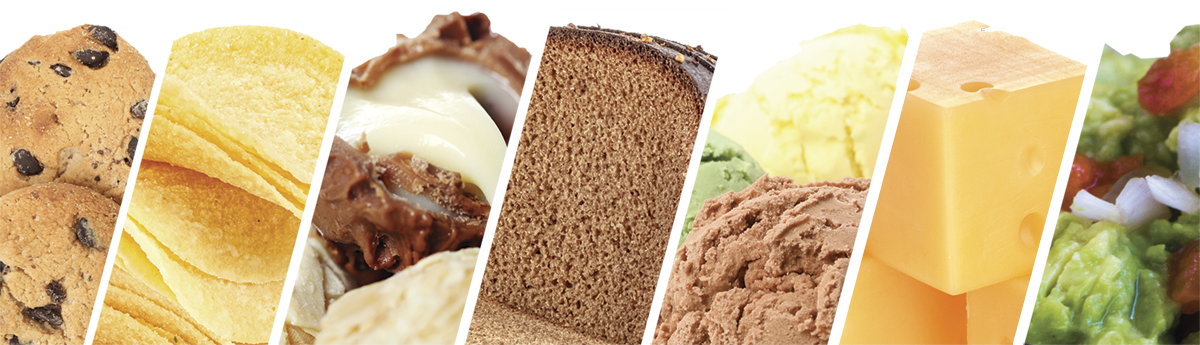


La desviación estándar y la varianza son dos medidas estadísticas que se utilizan comúnmente como descriptores de textura en el análisis de imágenes.

La **desviación estándar** mide la dispersión o variabilidad de los valores de píxeles en una región de la imagen. Una desviación estándar alta indica que los valores de píxeles están muy dispersos alrededor de la media, lo que puede interpretarse como una textura más rugosa o con más detalles, mientras que una desviación estándar baja indica que los valores de píxeles están más cerca de la media, lo que sugiere una textura más uniforme o suave.

Por otro lado, **la varianza** es una medida de la dispersión de los valores de píxeles con respecto a la media. Es el cuadrado de la desviación estándar. Una varianza alta indica una mayor variabilidad en los valores de píxeles, lo que también puede interpretarse como una textura más rugosa o con más detalles, mientras que una varianza baja indica una menor variabilidad y, por lo tanto, una textura más uniforme o suave.

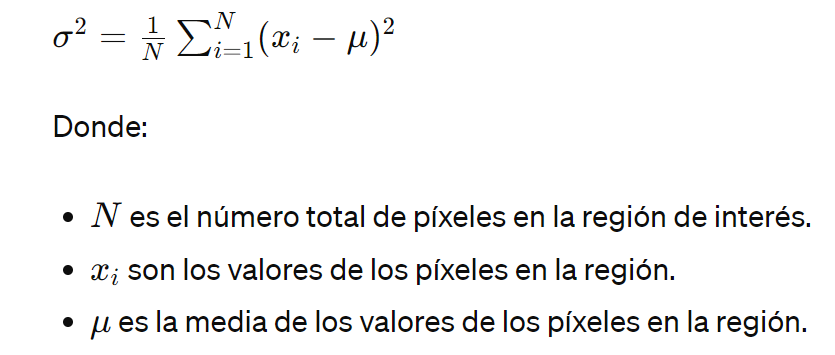

In [35]:
#4. Procesando las imágenes y extrayendo características una por una.

MC_Xtrain = np.zeros((X_train.shape[0],16)) # El tamaño es el total de las imágenes x las Características a tener en cuenta

for i in range(X_train.shape[0]):
  Imagen = X_train[i,:]
  Imagen = Imagen.reshape((28,28))
  Imagen = np.uint8(Imagen)
  Bandera, Imagen_bin = cv2.threshold(Imagen,20,255,cv2.THRESH_BINARY)


  #Extracción de características de la imagen
  contours, _ = cv2.findContours(Imagen_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) > 0:
    Region = max(contours, key=cv2.contourArea)

    # Alto y ancho
    P1,P2,Ancho,Alto = cv2.boundingRect(Region)

    # Calcular área
    area = cv2.contourArea(Region)/(28*28) # Un valor

    # Calcular perímetro
    perimetro = cv2.arcLength(Region, closed=True) # un valor

    # Calcular el centro de masa
    Momentos = cv2.moments(Region)
    center_x = int(Momentos['m10'] / Momentos['m00']) #Un valor
    center_y = int(Momentos['m01'] / Momentos['m00']) #Un valor

    # Calcular la circularidad
    circularity = (4 * np.pi * area) / (perimetro ** 2) #Un valor

    # Calcular la elipticidad
    try:
      _, (major_axis, minor_axis), _ = cv2.fitEllipse(Region)
      ellipticity = major_axis / minor_axis # Un valor
    except:
      ellipticity = 0

    hu_moments = np.transpose(cv2.HuMoments(Momentos)) # Siete valores

    # Calcular la desviación estándar y la varianza (Imagen en gris)
    std_deviation = np.std(Imagen)
    variance = np.var(Imagen)

    MC_Xtrain[i,0] = area
    MC_Xtrain[i,1] = perimetro
    MC_Xtrain[i,2] = center_x
    MC_Xtrain[i,3] = center_y
    MC_Xtrain[i,4] = circularity
    MC_Xtrain[i,5] = ellipticity
    MC_Xtrain[i,6:13] = hu_moments
    MC_Xtrain[i,13] = Alto
    MC_Xtrain[i,14] = Ancho
    MC_Xtrain[i,15] = std_deviation

In [36]:
#5. Normalizando las características para que las medidas queden entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MC_Xtrain = scaler.fit_transform(MC_Xtrain)

===================================================================

In [37]:
#6. Realizando el mismo ejercicio para los datos de testeo
MC_Xtest = np.zeros((X_test.shape[0],16)) # El tamaño es el total de las imágenes x las Características a tener en cuenta
for i in range(X_test.shape[0]):
  Imagen = X_test[i,:]
  Imagen = Imagen.reshape((28,28))
  Imagen = np.uint8(Imagen)
  Bandera, Imagen_bin = cv2.threshold(Imagen,20,255,cv2.THRESH_BINARY)


  #Extracción de características de la imagen
  contours, _ = cv2.findContours(Imagen_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) > 0:
    Region = max(contours, key=cv2.contourArea)

    # Alto y ancho
    P1,P2,Ancho,Alto = cv2.boundingRect(Region)


    # Calcular área
    area = cv2.contourArea(Region)/(28*28) # Un valor

    # Calcular perímetro
    perimetro = cv2.arcLength(Region, closed=True) # un valor

    # Calcular el centro de masa
    Momentos = cv2.moments(Region)
    center_x = int(Momentos['m10'] / Momentos['m00']) #Un valor
    center_y = int(Momentos['m01'] / Momentos['m00']) #Un valor

    # Calcular la circularidad
    circularity = (4 * np.pi * area) / (perimetro ** 2) #Un valor

    # Calcular la elipticidad
    try:
      _, (major_axis, minor_axis), _ = cv2.fitEllipse(Region)
      ellipticity = major_axis / minor_axis # Un valor
    except:
      ellipticity = 0

    hu_moments = np.transpose(cv2.HuMoments(Momentos)) # Siete valores

    # Calcular la desviación estándar y la varianza (Imagen en gris)
    std_deviation = np.std(Imagen)
    variance = np.var(Imagen)

    MC_Xtest[i,0] = area
    MC_Xtest[i,1] = perimetro
    MC_Xtest[i,2] = center_x
    MC_Xtest[i,3] = center_y
    MC_Xtest[i,4] = circularity
    MC_Xtest[i,5] = ellipticity
    MC_Xtest[i,6:13] = hu_moments
    MC_Xtest[i,13] = Alto
    MC_Xtest[i,14] = Ancho
    MC_Xtest[i,15] = std_deviation

In [38]:
#7. Normalizando datos
MC_Xtest = scaler.transform(MC_Xtest)

========================================================================

In [39]:
#8. Entrenando un clasificador para la toma de decisiones
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score

Modelo_KNN = KNeighborsClassifier(5)
Modelo_KNN.fit(MC_Xtrain, Y_train)

Y_pred =Modelo_KNN.predict (MC_Xtest)

print("Accuracy KNN",accuracy_score(Y_test, Y_pred))

Accuracy KNN 0.7526


Mostrando métricas globales individuales: 
Accuracy KNN 0.7526
Precision KNN 0.7503231842936172
Recall KNN 0.7525999999999999
F1_Score KNN 0.7491502622828391
 
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1000
           1       0.93      0.94      0.94      1000
           2       0.59      0.66      0.62      1000
           3       0.74      0.80      0.77      1000
           4       0.57      0.59      0.58      1000
           5       0.84      0.83      0.83      1000
           6       0.54      0.37      0.44      1000
           7       0.80      0.81      0.81      1000
           8       0.92      0.85      0.89      1000
           9       0.89      0.92      0.90      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000

 


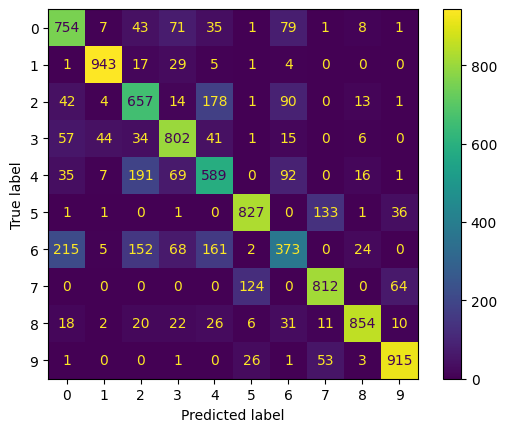

In [40]:
#9. Analizando desempeño con muchas métricas
from sklearn.metrics import confusion_matrix as CM,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import precision_score as PR
from sklearn.metrics import recall_score as RC
from sklearn.metrics import f1_score as F1
from sklearn.metrics import classification_report

print('Mostrando métricas globales individuales: ')
print("Accuracy KNN",ACC(Y_test, Y_pred))
print("Precision KNN",PR(Y_test, Y_pred, average='macro'))
print("Recall KNN",RC(Y_test, Y_pred, average='macro'))
print("F1_Score KNN",F1(Y_test, Y_pred, average='macro'))
print(' ')

report = classification_report(Y_test, Y_pred)
print("Reporte de Clasificación:\n", report)
print(' ')

Matriz = CM(Y_test, Y_pred, labels=Modelo_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=Matriz,display_labels=Modelo_KNN.classes_)
disp.plot()

==========================================================================

La predicción de KNN es: Saco_1 , y debería ser:  Abrigo


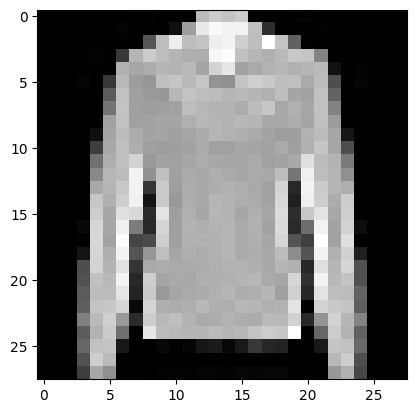



La predicción de KNN es: Sudadera , y debería ser:  Sudadera


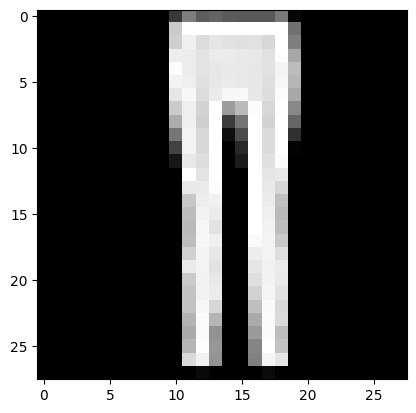



La predicción de KNN es: Camiseta , y debería ser:  Camiseta


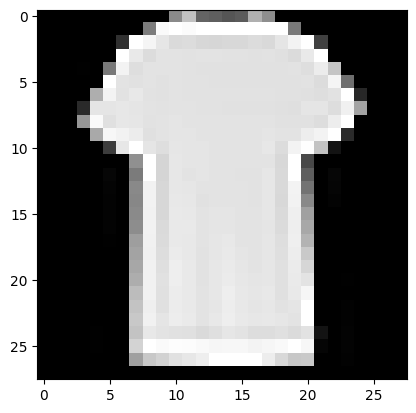



La predicción de KNN es: Saco_1 , y debería ser:  Camiseta


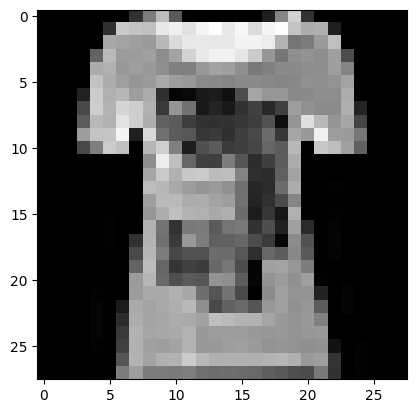



La predicción de KNN es: Bolso , y debería ser:  Bolso


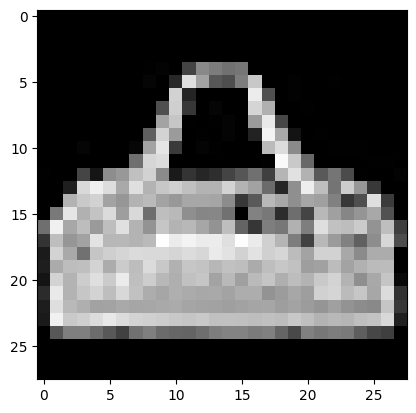



La predicción de KNN es: Saco_2 , y debería ser:  Saco_1


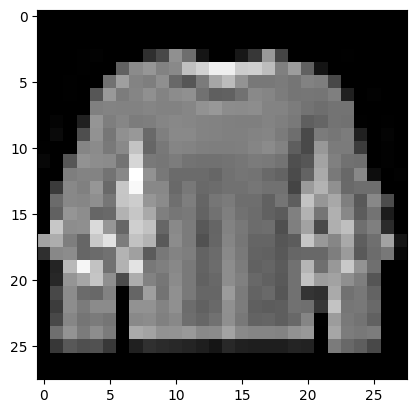



La predicción de KNN es: Abrigo , y debería ser:  Bolso


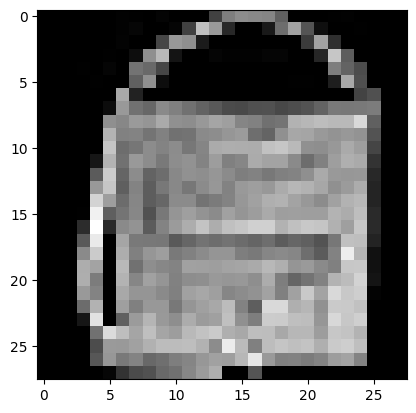



La predicción de KNN es: Tenis , y debería ser:  Tenis


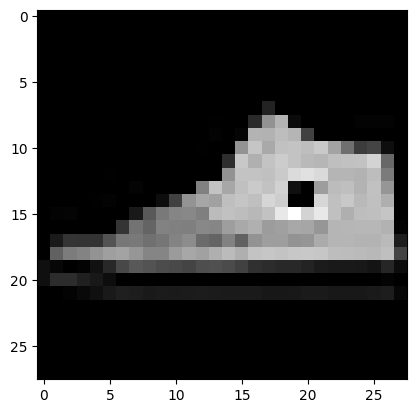

In [43]:
#10. Revisando varios casos del test
Test = [150,700,1500,4000,5420,7100,8754,9500]
for i in (Test):
  Target_im = X_test[i,:].reshape((28,28))
  Target=np.zeros((1,16))
  Target[0,:] = MC_Xtest[i,:]
  Prediction = Modelo_KNN.predict (Target)
  print("La predicción de KNN es:",Elementos[Prediction[0]],', y debería ser: ',Elementos[Y_test[i]])
  plt.imshow(Target_im.astype('uint8'),cmap='gray',vmin=0, vmax=255)
  plt.show()
  print('')
  print('')